In [ ]:
#0. Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1. Reading and preparing data
train_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_digits_data.csv')
test_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_digits_data.csv')

train_set_img = train_set.drop('character',axis=1)
train_set_lbl = train_set['character']

test_set_img = test_set.drop('character',axis=1)
test_set_lbl = test_set['character']

train_set_image = train_set_img.values
train_set_image_input = train_set_image.reshape((-1,32,32,1)).astype('float32')/255

test_set_image = test_set_img.values
test_set_image_input = test_set_image.reshape((-1,32,32,1)).astype('float32')/255

label_map = {label: i for i, label in enumerate(train_set_lbl.unique())}
train_set_lbl_int = train_set_lbl.map(label_map)
test_set_lbl_int = test_set_lbl.map(label_map)

#2. Model creation (CNN)
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,1),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.03),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#3. Input feeding
inp_history = model.fit(train_set_image_input,train_set_lbl_int,epochs=5,validation_data=(test_set_image_input,test_set_lbl_int))
loss,acc = model.evaluate(test_set_image_input,test_set_lbl_int,verbose=2)
print(f"Accuracy of model: {acc}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
532/532 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.6214 - loss: 1.1629 - val_accuracy: 0.9217 - val_loss: 0.2337
Epoch 2/5
532/532 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9552 - loss: 0.1359 - val_accuracy: 0.9700 - val_loss: 0.0995
Epoch 3/5
532/532 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.9780 - loss: 0.0713 - val_accuracy: 0.9587 - val_loss: 0.1161
Epoch 4/5
532/532 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9814 - loss: 0.0530 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 5/5
532/532 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9870 - loss: 0.0394 - val_accuracy: 0.9830 - val_loss: 0.0563
94/94 - 2s - 19ms/step - accuracy: 0.9830 - loss: 0.0563
Accuracy of model: 0.9829999804496765


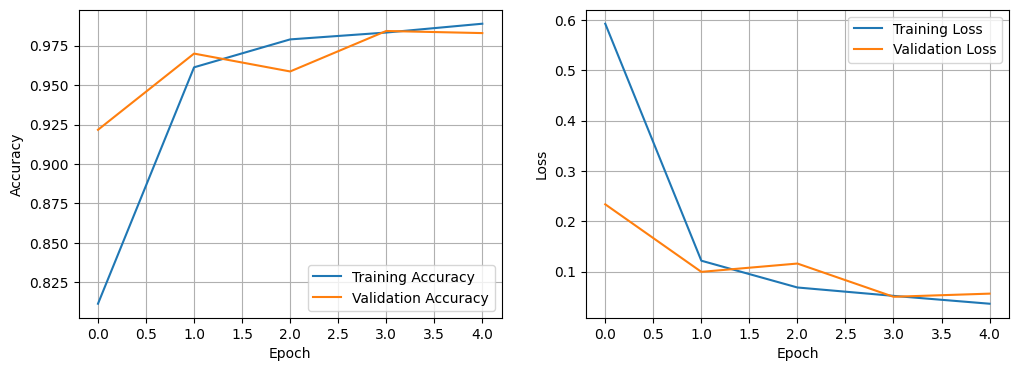

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


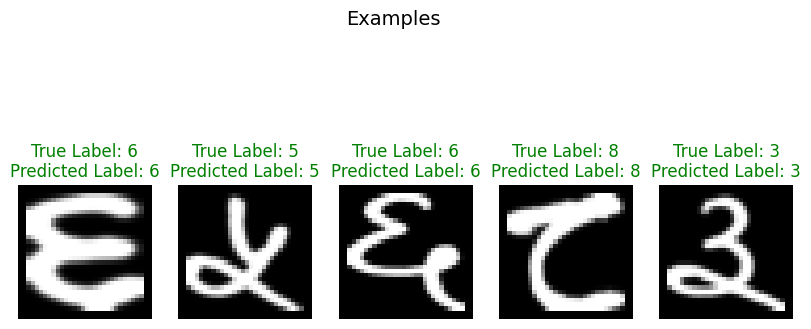

In [ ]:
#4. Plotting performance and output
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(inp_history.history['accuracy'],label='Training Accuracy')
plt.plot(inp_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(inp_history.history['loss'],label='Training Loss')
plt.plot(inp_history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

pred = model.predict(test_set_image_input)
num_img = 5
total = len(test_set_image_input)
random_indc = np.random.choice(total,num_img,replace=False)
plt.figure(figsize=(10,5))

for i in range(num_img):
  plt.subplot(1,num_img,i+1)
  idx = random_indc[i]
  plt.imshow(test_set_image_input[idx].reshape(32,32),cmap='gray')
  plt.axis('off')

  pred_label = np.argmax(pred[idx])
  true_label = test_set_lbl_int[idx]
  result_color = 'green' if pred_label==true_label else 'red'
  plt.title(f"\nTrue Label: {true_label}\nPredicted Label: {pred_label}",color=result_color)

plt.suptitle('Examples',fontsize=14)
plt.show()